<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A18_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import cohen_kappa_score as kap
from sklearn.metrics import accuracy_score as oa
from sklearn.metrics import classification_report as cp
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import precision_recall_curve as pr 
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
plt.rcParams['figure.figsize']=[10,8]

Q1: Why is it important to use withheld validation data when assessing models
as opposed to the data used to train the model?

The prediction of nominal variables are assessed using the withheld testing or validation data because it is important not to use the trained or used data. Those used datasets have no way of verifying that our model learned real patterns in the data, and it could results in overly optimistic metrics on model’s performance because the model has already seen the data and knows exactly how to handle it. Therefore, we can reduce the bias and errors by using the withheld dataset to check how well a model will perform on the new dataset


Q2 Explain the difference between Overall Accuracy and Kappa for assessing a
multiclass classification.

The overall Accuracy is one of the most popular metrics in multi-class classification and it is directly computed from the confusion matrix.It consider the sum of features correclty classified over the total number of features. It measures of how much the model is correctly predicting on the entire set of data. 

The kappa reveals how well the model has predicted data assignments in different classes compared to a random class assignment. It is essentially an adjustment of of overall accraucy that consider random chances 

Q3 Explain the difference between Precision, Recall, F1-Score, Specificity, and
Negative Predictive Value for assessing a binary classification.

-In binary classification, precision is calculated as the number of true positives divided by the total number of true positives and false positives.The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.

-Recall in an imbalanced classification problem with two classes, it is then calculated as the number of true positives divided by the total number of true positives and false negatives.

-The F1 Score is the 2*((precision * recall)/(precision+recall)). It conveys the balance between the precision and the recall, which combine both precision and recall into a single measure that captures both properties. 

-Specificity is the metric that evaluates a model’s ability to predict true negatives of each available category. which is presented as number of true negatives divided by total number of true negatives and false positives. 

- Negative Predictive Value(NPV) describe the performance of a diagnostic test or other statistical measure, whether the test result is negative. it is calculated as NPV = TN / (FN + TN), which indicates errors and negative class.


Q4. Explain the difference between the Receiver Operating Characteristic (ROC)
curve and the Precision-Recall (PR) curve for assessing a probabilistic prediction

The ROC is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 

precision recall curve(PR) is simular to ROC, which is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds. It takes the true output values and the probabilities for the positive class as input and returns the precision, recall and threshold values. in a way PR is more informative than the ROC Plot when evaluating binary classifiers on imbalanced Datasets. 

Q5. Explain the meaning and interpretation of the area under the curve (AUC)
measure calculated from the Receiver Operating Characteristic Curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1, and the higher the AUC, the better the model. 




Q6. Explain how R-squared is calculated. What is the unit of measurement of Rsquared?

-squared value is a measure that provides information about the fitness or accuracy of a model. It can be calculated as function 1-(sum squared regression (SSR)/total sum of squares (SST)). The closer the R2 value to 1, then better fitting the regression model is. It is essnetially a a fraction between 0.0 and 1.0, which means there's no real units for R sqaured but the unit of the Rsquared is determined by what data we are processing

Q7. Explain how Root Mean Square Error (RMSE) is calculated. What is the unit
of measurement? 

Root mean sqaure error shows how far predictions fall from measured true values. RMSE is a combination of calculated residual (difference between prediction and truth), computed norm of residual for each data point, computed the mean of residuals and take the square root of that mean. It can also be explained as the standard deviation of the residuals, and measures how spread out these residuals are from the regression line. The units for RMSE is also simular to the R squared values that they follow our input units.

In [ ]:

c1= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/classification_data.csv")
c2= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/classification_data2.csv")
b1= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/binary_data.csv")
r1= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/regression_data.csv")

Task 1 The “classification_data.csv” dataset contains three columns and relates to a multiclass classification where five classes are differentiated. Each class has been assigned a numeric value (1 through 5), but these values represent categories or nominal data. The “truth” column represents the correct or reference class while the “m1” and “m2” columns represent separate predictions. Generate Confusion Matrices from the reference data and predictions obtained using the different models. Next, calculate the Overall Accuracy and Kappa statistic for both models. 

Based on these results, which model provided the best performance? What classes were most difficult to differentiate?

Answer:
 Based on the generated overall accuracy and kappa +score results in the 
following codes, we can see that model 2 has a slighlty better performance among the two models. The class 2 in the confusing matrix is the most difficult to differentiate and it has the lowest accraucy. 

[[266   0  32   0   2]
 [  0 152   6   3   1]
 [ 40  27 268  16   0]
 [  0  31  24 100   0]
 [  1  13   6   0  12]]
0.798
0.7251375332862529


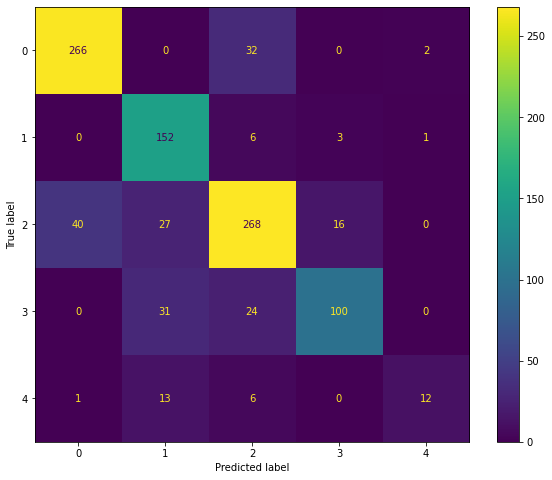

In [ ]:
import sklearn
#Task 1 
#for m1 column
print(cm(c1.truth,c1.m1))
print(oa(c1.truth, c1.m1))
print(kap(c1.truth, c1.m1))
cmplot= sklearn.metrics.ConfusionMatrixDisplay(cm(c1.truth,c1.m1))
cmplot.plot()
plt.show(cmplot)

[[256   6  35   1   2]
 [  0 160   0   2   0]
 [ 38  16 272  24   1]
 [  0  17  15 122   1]
 [  8   3   1   0  20]]
0.83
0.7700962890836309


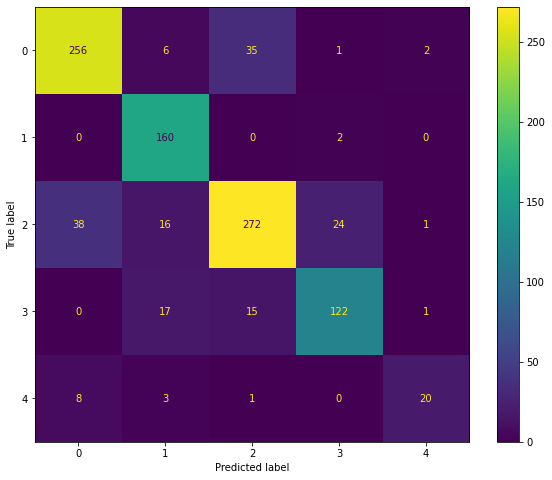

In [ ]:
#for m2 column
print(cm(c1.truth,c1.m2))
print(oa(c1.truth, c1.m2))
print(kap(c1.truth, c1.m2))
cmplot= sklearn.metrics.ConfusionMatrixDisplay(cm(c1.truth,c1.m2))
cmplot.plot()
plt.show(cmplot)

Task 2. The “classification_data2.csv” dataset represents classification results for
differentiating six forest community types across the state of West Virginia using
variables derived from satellite data and digital elevation data. The “Fall_T” models
used only imagery collected in the fall along with digital terrain variables; the “Spr_T”
models were produced using spring imagery and digital terrain variables; and the
“Sum_T” models were produced using summer imagery and digital terrain variables.
The “H_T” model used imagery from multiple seasons, which were summarized using
a process called harmonic regression, alongside the digital terrain variables. The “set”
column defined which dataset was used while the “OA” column provides the Overall
Accuracy, and the “k” column provided the Kappa statistic. Each of the for sets of
variables were used to train 50 different models using different training and testing
data partitions in order to capture the variability in model performance when given
different input samples. Create two grouped boxplots. The first plot should show the
distribution of Overall Accuracy for each of the replicate sets as four separate boxplots.
The second should show Kappa as opposed to Overall Accuracy. Based on these results,
discuss the relative performance of the different sets of feature and also the variability
in performance when different data partitions were used.

Answer: 
Based on the boxplots results of overall accuracy and kappa, we can indicate that H_T set (imagery from multiple seasons) has the highest accuracy for the overall accuracy test among the 4 models. The two boxplots with distribution of Overall Accuracy and Kappa for each of the replicate sets showed really simular patterns in terms of the 4 models. Both of them have H_T as the highest scores and Sum_T and Fall_T have the lowest accuray and Kappa scores. The only notable differncee is that the overall Kappa socres are slightly lower than the OA scores. I think these results also make sense since the fall and summary imagery and digital terrain variables are least accurate due to the trees' canopies are mostly still in place, which could affect the satellite data accuracy. 

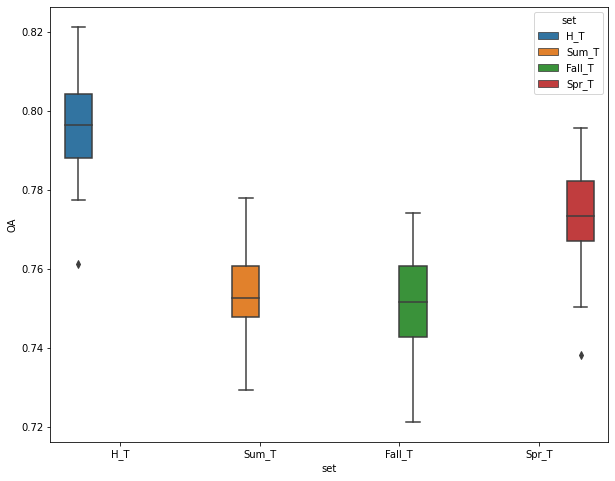

In [ ]:
#Task 2 boxplot 1 
sbn.boxplot(x= "set", y= "OA", hue= "set", data= c2)

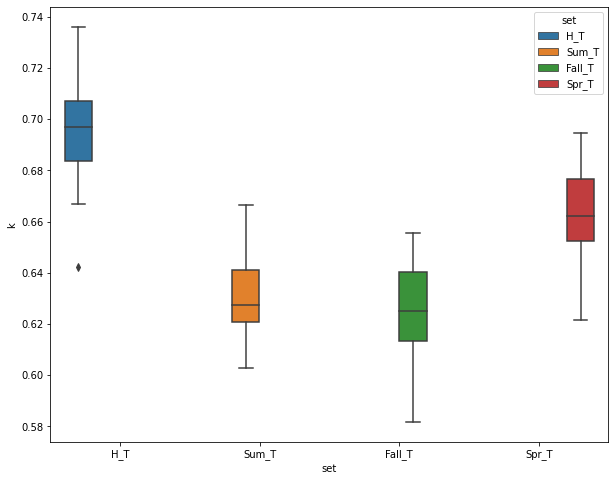

In [ ]:
#boxplot 2 
sbn.boxplot(x= "set", y= "k", hue= "set", data= c2)

Task 3. The “binary_data.csv” dataset represents results for predicting the likelihood of
landslide occurrence as predicted using a random forest model. The “truth” column
represents the correct classification (“not” = not a landslide; “slopeD” = a landslide). The
“predicted” column represents the predicted class. The “prob_not” column represents
the predicted probability of the location not being a landslide while the “prob_fail”
column represented the predicted probability of the site being a landslide. There are an
equal number of “not landslide” and “landslide” examples based on the reference
classification. The “slopeD” class should be treated as the positive outcome. From these
data and using the classification results and reference classification calculate the
following metrics: Precision, Recall, F1-Score, Specificity, and Negative Predictive
Value. From these data and using the reference classification and predicted class
probabilities, calculate the Area Under the ROC and PR Curves. Discuss the results in
regards to the model performance. What was the dominant source of error in the model:
false positives or false negatives?

Answer: 
According to the results of the confusing matrix, overall accuracy and kappa score, we can indicate the the model is relatively accurate. The "SlopeD" data and the "Not" data showed simular results in the classification report. It is also  desired that a model should have both high precision,and high recall. AUC represents the probability that a random positive example is positioned to the right of a random negative example. Therefore a good PR curve has greater AUC, and our output areas under curves are all quite high with 0.94 and 0.93. The most dominant source error from our numbers seem to be the false negative with 78 samples while false postive have 47 samples. 

In [ ]:
#Task 3 
print(cm(b1.truth,b1.predicted))
print(oa(b1.truth,b1.predicted))
print(kap(b1.truth,b1.predicted))
print(cp(b1.truth,b1.predicted))

[[422  78]
 [ 47 453]]
0.875
0.75
              precision    recall  f1-score   support

         not       0.90      0.84      0.87       500
      slopeD       0.85      0.91      0.88       500

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.87      1000
weighted avg       0.88      0.88      0.87      1000



In [ ]:
#area under ROC
b1["code"]=(b1.truth.replace({"not":0, "slopeD":1}))
print(rocauc(b1.code,b1.prob_fail))
#PR curve
precision, recall, thresholds = pr(b1.code,b1.prob_fail)
auc_precision_recall=auc(recall,precision)
print(auc_precision_recall)

0.9451720000000001
0.9333488283033281


Task 4. The “regression_data.csv” dataset contains 156 values (“truth”) and associated
predictions using three different models (“m1”, “m2”, and “m3”). Calculate the RSquared and RMSE metrics for each of the three models. How do these models compare
in regards to accuracy and the amount of variability in the value of interest explained? 

Answer: 
All three models have simular output results interms of RMSE and R2. The R squred resutls are all above 0.75, which generally be seen as showing a high level of correlation with the models. The three models' fitness are quite high from the R2 results, which indicates relatively higher accuracy. On the other hand, the Root mean squared error values of all three models are also quite low in the range of 0.3-0.4. The lower RMSE values usually demonstrate that the model can relatively predict the data accurately. Therefore, we observed that all m1, m2 and m3 re accurate models based on our output R2 and RMSE values, 
while M1 has the lowest RMSE and highest Rsqaured value among the three models. 

In [ ]:
#Task 4
#M1  
print(rmse(r1.truth,r1.m1,squared=False))
print(r2(r1.truth,r1.m1))

0.3695071770290749
0.7712611028200671


In [ ]:
#M2
print(rmse(r1.truth,r1.m2,squared=False))
print(r2(r1.truth,r1.m2))

0.38009196722653216
0.7579686354532824


In [ ]:
#M3
print(rmse(r1.truth,r1.m3,squared=False))
print(r2(r1.truth,r1.m3))

0.3827147802890234
0.7546168506281636
